In [87]:
import pandas as pd
from io import StringIO
import os
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def read_trace(trace_dir, trace_file, worker_id=None):
    trace_filepath = os.path.join(trace_dir, trace_file)
    
    with open(trace_filepath,"r") as rf:
        new_trace = StringIO()
        line = rf.readline()
        while line:
            line_list = line.split()
            if line_list[0] == "[trace]" or line_list[0] == "[PROF]":
                new_trace.write(line)
            line = rf.readline()
       
    new_trace.seek(0)
    df = pd.read_csv(new_trace, sep=" ", names=["InfoType", "EventType", "EventState", "ID", "Time"])
    del df["InfoType"]
    
    if worker_id is not None:
        df.insert(0, "WorkerID", worker_id)
        
    new_trace.close()
    
    return df

In [89]:
p_size_list = ["10000", "5000000", "10000000"]
message_size_list = [123272, 60007727, 120011202]

In [90]:
bw = "1000"
serial_time_list = []
send_no_serial_list = []
send_time_list = []

for p_size in p_size_list:
    trace_dir = "/home/posheng/billy_ws/fl_025/paslab/trace/async2_fl_bw_3rm_unmask_trace/" + "hpc3-hpc0-" + bw + "Mbps/" + "node_num_" + p_size
    trace_file = "coord.txt"
    
    df = read_trace(trace_dir, trace_file, worker_id=None)
    df = df[6:]
    
    serial_time = df[df["EventType"] == "Serialization"]["Time"].mean()
    send_time = df[df["EventType"] == "ModelSend"]["Time"].mean()
    
    serial_time_list.append(serial_time)
    send_time_list.append(send_time)
    send_no_serial_list.append(send_time - serial_time)

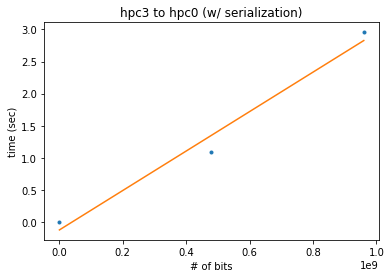

In [91]:
index_list = [int(message_size)*8 for message_size in message_size_list]
z2 = np.polyfit(index_list, send_time_list, 1)
p2 = np.poly1d(z2)
xp = np.linspace(index_list[0], index_list[-1], 1000)

plt.title('hpc3 to hpc0 (w/ serialization)')
plt.xlabel('# of bits')
plt.ylabel('time (sec)')
plt.plot(index_list, send_time_list, '.', xp, p2(xp))

In [92]:
1/z2[0] / 1000 / 1000

325.08967906995747

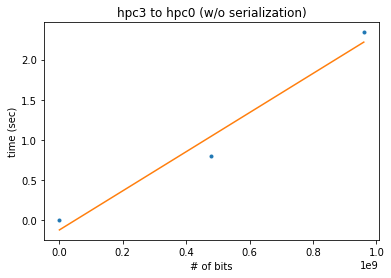

In [93]:
index_list = [int(message_size)*8 for message_size in message_size_list]
z2 = np.polyfit(index_list, send_no_serial_list, 1)
p2 = np.poly1d(z2)
xp = np.linspace(index_list[0], index_list[-1], 1000)

plt.title('hpc3 to hpc0 (w/o serialization)')
plt.xlabel('# of bits')
plt.ylabel('time (sec)')
plt.plot(index_list, send_no_serial_list, '.', xp, p2(xp))

In [94]:
1/z2[0] / 1000 / 1000

410.46957908633755

In [78]:
send_time_list

[0.01583487457699246, 5.3949267864227295, 11.297174162334866]

In [60]:
send_no_serial_list

[0.10499106513129342, 50.436984393331734, 100.99844541814592]